<a name='top'></a>    
<div style="width:900px;background:#fdf0db;border:1px solid black;text-align:left;padding:8px;">
    <p>
        <span style="font-size:14pt">
            <b>Scraping from my www.mycareersfuture.sg</b>
        </span>
    </p>
</div>

<div style="width:900px;background:#f2f2f2;border:1px solid black;text-align:left;padding:8px;">
    <p>The Main Purpose of this notebook is to <b>Process all the detail files</b> that was <br>generated during web scrapping.<br><br>   Data Cleaning & Validation was performed on each feature.  <br>Furthermore, Feature Engineering was used to create new features as well. <br><br>
    After all these were done, the final version of the details will be written off to a new output file.<br><br>
        <b>Step 1:</b> URL = www.mycareersfuture.sg<br>
        <b>Step 2:</b> Open Detail Files<br>
        <b>Step 3:</b> Clean Duplicate Rows<br>
        <b>Step 4:</b> EDA & Data Analysis<br>
        <b>Step 5:</b> Save Data to Output<br>
 

   

## Notebook Outline ##    
1. [Open Input Data Files](#open)
2. [Cleaning of Duplicate Rows](#dup0)    
2.1 [Drop Duplicates based on All Fields](#dup1)     
2.2 [Drop Duplicates based on 'Link' Fields](#dup2)     
2.3 [Check for fields with null values](#dup3)    
3. [EDA, Data Analysis & Data Validation](#data)     
3.1. [Salary](#col1)  
3.1.1. [Salary Range](#col1a)      
3.1.2. [Salary Terms](#col1b)      
3.1.3. [Converting Annual Salary to Monthly](#col1c)      
3.1.4. [Average Salary](#col1d)  
3.1.5. [Salary Median](#col1e)  
3.2   [Companys](#col2)  
3.3   [Employment Type](#col3)     
3.4   [Seniority](#col4)     
3.5   [Industrys](#col5)     
3.6   [Locations](#col6)     
3.7   [Government Support](#col7)     
3.8. [Job Titles](#col8)     
3.8.1. [NMF Preprocessing](#col8a)     
3.8.2. [NMF Model](#col8b)     
3.8.3. [New Field job_titles_topics](#col8c)     
3.9.  [Job Descriptions](#col9)     
3.9.1 [LDA - Preprocessing](#col9a)     
3.9.2 [LDA Topic Model](#col9b)     
3.9.3 [New Field job_description_topic](#col9c)     
3.10 [Job Requirements](#col10)     
3.10.1 [Null Values in Job Requests](#col10a)     
3.10.2 [NMF Preprocessing](#col10b)     
3.10.3 [NMF Model](#col10c)     
3.10.4 [New Field job_req_topics](#col10d)     
4. [Write final Dataframe in an output file](#write)      
  

</div>

In [1]:
import os
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='open'><font color=black>Opening Detail Files     
    </a></h7></b>    

- Open Detail Files list and store them in a dataframe
</div>

In [2]:
## Generate a list of detail files to be processed
path='data\\'
myfiles=['{}outfile_0{}_detail.csv'.format(path,x) for x in range(6)]  


for x in range(5):
    myfiles.append('{}outfile_a0{}_detail.csv'.format(path,x))

myfiles

['data\\outfile_00_detail.csv',
 'data\\outfile_01_detail.csv',
 'data\\outfile_02_detail.csv',
 'data\\outfile_03_detail.csv',
 'data\\outfile_04_detail.csv',
 'data\\outfile_05_detail.csv',
 'data\\outfile_a00_detail.csv',
 'data\\outfile_a01_detail.csv',
 'data\\outfile_a02_detail.csv',
 'data\\outfile_a03_detail.csv',
 'data\\outfile_a04_detail.csv']

In [3]:
## Open Detail files and store all records in mylist
mylist=[]

for file in myfiles:
    df = pd.read_csv(file, encoding='latin1')
    mylist.append(df)
    print(file,df.shape)

data\outfile_00_detail.csv (140, 13)
data\outfile_01_detail.csv (137, 13)
data\outfile_02_detail.csv (116, 13)
data\outfile_03_detail.csv (104, 13)
data\outfile_04_detail.csv (147, 13)
data\outfile_05_detail.csv (90, 13)
data\outfile_a00_detail.csv (236, 13)
data\outfile_a01_detail.csv (266, 13)
data\outfile_a02_detail.csv (260, 13)
data\outfile_a03_detail.csv (100, 13)
data\outfile_a04_detail.csv (19, 13)


In [4]:
## Combine all records in one data frame.
df = pd.concat(mylist, axis=0, ignore_index=True)
df.shape

(1615, 13)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='dup0'><font color=black>Cleaning of Duplicate Rows     
    </a></h7></b>    

- Drop Duplicaes based on All Fields
- Drop Duplicates based on 'Link' Field
<div>

<b><h7><a name='dup1'><font color=black>Drop Duplicates based on All Fields</a></h7> 

In [5]:
## Drop Duplicates based on All Fields 
df.drop_duplicates(subset=None, keep='first', inplace=True)
print('df.shape:',df.shape)

df.shape: (1598, 13)


<b><h7><a name='dup2'><font color=black>Drop Duplicates based on 'Link' Fields</a></h7>     

In [6]:
## Search for duplicates based on link Field
vcount=df.links.value_counts().sort_values(ascending=False)

x=[[x,y] for x,y in vcount.items() if y>1]
print('Duplicate Rows(link field):',len(x))

Duplicate Rows(link field): 385


In [7]:
## Drop Duplicates (based on all link Field)
df.drop_duplicates('links', keep='first', inplace=True)

In [8]:
## Search for duplicates based on link Field
vcount=df.links.value_counts().sort_values(ascending=False)

x=[[x,y] for x,y in vcount.items() if y>1]
print('Duplicate Rows(based on link field):',len(x))
print('df.shape:',df.shape)

Duplicate Rows(based on link field): 0
df.shape: (1018, 13)


<b><h7><a name='dup3'><font color=black>Check for fields with null values:</a></h7>     

In [9]:
## check for fields with null values:
chk_null=df.isnull().sum()
[[x,y] for x,y in chk_null.items() if y>0]

[['seniority', 30],
 ['salary_terms', 91],
 ['job_requirements', 62],
 ['location', 260],
 ['gov_support', 428]]

In [10]:
## These fields will be handled later...

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<h7><a name='data'><font color=black>EDA, Data Analysis & Data Validation     
    </a></h7></b>
</div>    
<p><b>
Analyze each column and peform the following validations<br></b>
    1. Check for null values<br>
    2. Perform EDA<br>
    3. Perform Feature Engineering (if necessary)<br>
</p>

- Analyze each column and peform the following validations
    * Check for null values
    * Perform EDA
    * Perform Feature Engineering (if necessary)

In [11]:
[x for x in df.columns]

['Unnamed: 0',
 'job_titles',
 'companys',
 'employment_type',
 'seniority',
 'industrys',
 'salary',
 'salary_terms',
 'job_descriptions',
 'job_requirements',
 'links',
 'location',
 'gov_support']

In [12]:
## drop unnamed field
df.drop('Unnamed: 0', axis=1, inplace=True)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
 
<b><h7><a name='col1'><font color=black>Salary</a></h7> 

<h7><a name='col1a'><font color=black><b>Salary Range</b></a></h7><br>
- Based on Initial Analysis, this field contains null values.  These are 
job applications <br>that contain undisclosed salary.  We will Drop these rows    

In [13]:
## Compare null values in salary_terms & salary values that arer undisclosed.
print('# of null values in salary:',len(df[df.salary=='Salary undisclosed']))
print('# of null values in salary_terms:',df.salary_terms.isnull().sum())

# of null values in salary: 91
# of null values in salary_terms: 91


In [14]:
## this means that all rows with undisclosed salary has 
## null values in its salary terms

In [15]:
## drop data with undisclosed salary
df = df[df.salary != 'Salary undisclosed']

print('NULL salary_terms:', df.salary.isnull().sum())

NULL salary_terms: 0


In [16]:
## salary_terms

In [17]:
df.salary.head()

1    $90,000to$150,000
2      $7,700to$15,400
3      $5,000to$10,000
4       $6,000to$8,000
5       $3,500to$5,800
Name: salary, dtype: object

<b><h7><a name='col1b'><font color=black>Salary Terms</a></h7> 

In [18]:
## remove $ and commas in salary
df.salary=df.salary.apply(lambda x: x.replace('$',''))
df.salary=df.salary.apply(lambda x: x.replace(',',''))

## split salary in min and max salary
df['min_salary'] = df.salary.apply(lambda x: x.split('to')[0])
df['max_salary'] = df.salary.apply(lambda x: x.split('to')[-1])

# convert fields to numeric
df['min_salary'] = df['min_salary'].convert_objects(convert_numeric=True)
df['max_salary'] = df['max_salary'].convert_objects(convert_numeric=True)

In [19]:
cols=['min_salary','max_salary','salary_terms']
df[df['salary_terms']=='Annually'][cols].head(3)

,min_salary,max_salary,salary_terms
1,90000,150000,Annually
8,90000,150000,Annually
10,72000,140000,Annually


<b><h7><a name='col1c'><font color=black>Convert Annual Salary to Monthly</a></h7> 

In [20]:
## Convert all Annual salary terms to monthly.
## Assumption: No bonuses or any other packages in salary.  
##  So we will divide the min and max salary by 12 to get the 
##  monthly salary.

In [21]:
cols=['min_salary','max_salary','salary_terms']
df[cols].head(5)

,min_salary,max_salary,salary_terms
1,90000,150000,Annually
2,7700,15400,Monthly
3,5000,10000,Monthly
4,6000,8000,Monthly
5,3500,5800,Monthly


In [22]:
## Convert annual salary into monthly salary
df['min_salary']=[round(salary/12,2) if term=='Annually' else salary 
    for salary,term in df[['min_salary','salary_terms']].values]

df['max_salary']=[round(salary/12,2) if term=='Annually' else salary 
    for salary,term in df[['max_salary','salary_terms']].values]

#df.loc[df.salary_terms.str.contains('Annually')] = 'Monthly'
df['salary_terms']=['Monthly' if term=='Annually' else term for term 
                    in df.salary_terms]

In [23]:
cols=['min_salary','max_salary','salary_terms']
df[cols].head(3)

,min_salary,max_salary,salary_terms
1,7500.0,12500.0,Monthly
2,7700.0,15400.0,Monthly
3,5000.0,10000.0,Monthly


In [24]:
df.salary_terms.value_counts()

Monthly    927
Name: salary_terms, dtype: int64

In [25]:
print('num of zero values in min_salary:',df['min_salary'].isnull().sum())
print('num of zero values in max_salary:',df['max_salary'].isnull().sum())
df[['min_salary','max_salary']].dtypes

num of zero values in min_salary: 0
num of zero values in max_salary: 0


min_salary    float64
max_salary    float64
dtype: object

In [26]:
## convert this columns to numeric 
df['max_salary'] = df['max_salary'].convert_objects(convert_numeric=True)
df['min_salary'] = df['min_salary'].convert_objects(convert_numeric=True)

df[['min_salary','max_salary']].dtypes

min_salary    float64
max_salary    float64
dtype: object

<b><h7><a name='col1d'><font color=black>Average Salary</a></h7> 

In [27]:
## Create New Column Average Salary.  
##    average_salary = (min_salary + max_salary) / 2

df['average_salary'] = (df.min_salary + df.max_salary) / 2

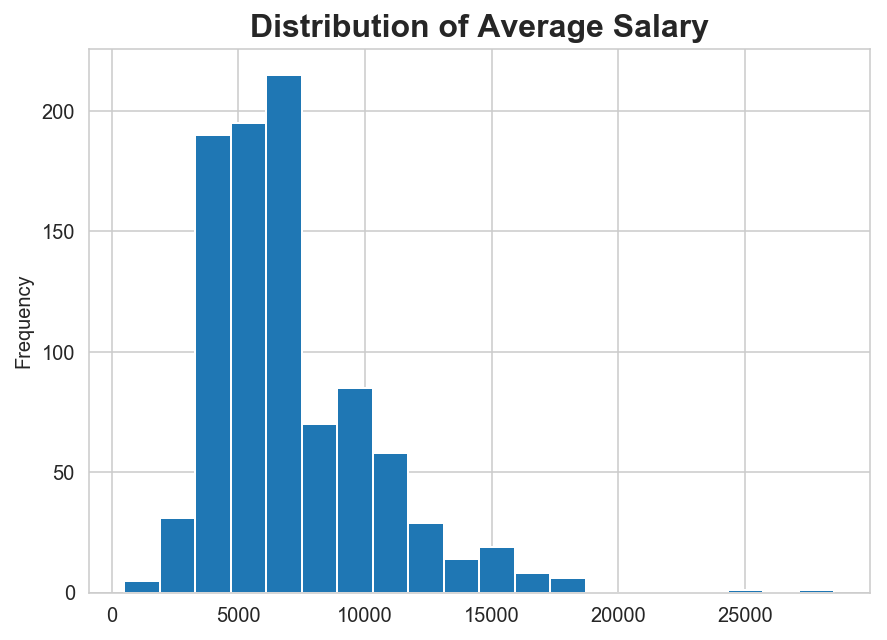

In [28]:
plt.figure(figsize=(7,5))
df['average_salary'].plot.hist(bins=20)
plt.title('Distribution of Average Salary',fontsize=16,fontweight='bold')
plt.show()

In [29]:
df['min_salary'].isnull().sum()
df['max_salary'].isnull().sum()
df.dtypes

job_titles           object
companys             object
employment_type      object
seniority            object
industrys            object
salary               object
salary_terms         object
job_descriptions     object
job_requirements     object
links                object
location             object
gov_support          object
min_salary          float64
max_salary          float64
average_salary      float64
dtype: object

<b><h7><a name='col1e'><font color=black>Salary Median</a></h7> 

In [30]:
salary_med=df['average_salary'].median()
print('Median of average_salary:',salary_med)

#creating a column denoting salarys less than median average salary 
#   as 0 and above to be 1

df['salary_med']=df.average_salary.apply(lambda x: 1 if x>= salary_med else 0)

df.salary_med.value_counts()

Median of average_salary: 6500.0


1    481
0    446
Name: salary_med, dtype: int64

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col2'><font color=black>Companys</a></h7> 

In [31]:
## Search for duplicates based on companys Field
field_count=df.companys.value_counts().sort_values(ascending=False)

print('Top Companys:')
[[x,'{} Duplicates Found'.format(y)] for x,y in field_count.items() if y>10]

Top Companys:


[['Company Undisclosed', '51 Duplicates Found'],
 ['NANYANG TECHNOLOGICAL UNIVERSITY', '50 Duplicates Found'],
 ['MACHSPEED HUMAN RESOURCES PTE. LTD.', '43 Duplicates Found'],
 ['A*STAR RESEARCH ENTITIES', '38 Duplicates Found'],
 ['DBS BANK LTD.', '37 Duplicates Found'],
 ['NATIONAL UNIVERSITY OF SINGAPORE', '25 Duplicates Found'],
 ['GOVERNMENT TECHNOLOGY AGENCY', '18 Duplicates Found'],
 ['TRAVELOKA SERVICES PTE. LTD.', '17 Duplicates Found'],
 ['TOOKITAKI HOLDING PTE. LTD.', '15 Duplicates Found'],
 ['SINGAPORE MANAGEMENT UNIVERSITY', '12 Duplicates Found'],
 ['DATAROBOT SINGAPORE PTE. LTD.', '11 Duplicates Found']]

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b><b>
<h7><a name='col3'><font color=black>Employment Type</a></h7> 

In [32]:
## employment_type
df.employment_type.value_counts()

Full Time                                                          300
Permanent                                                          240
Permanent, Full Time                                               133
Contract, Full Time                                                124
Contract                                                            92
Permanent, Contract                                                 13
Permanent, Contract, Full Time                                      11
Full Time, Internship                                                4
Internship                                                           3
Permanent, Flexi work                                                2
Contract, Internship                                                 1
Part Time                                                            1
Freelance                                                            1
Part Time, Permanent, Temporary, Contract, Freelance, Full Time      1
Tempor

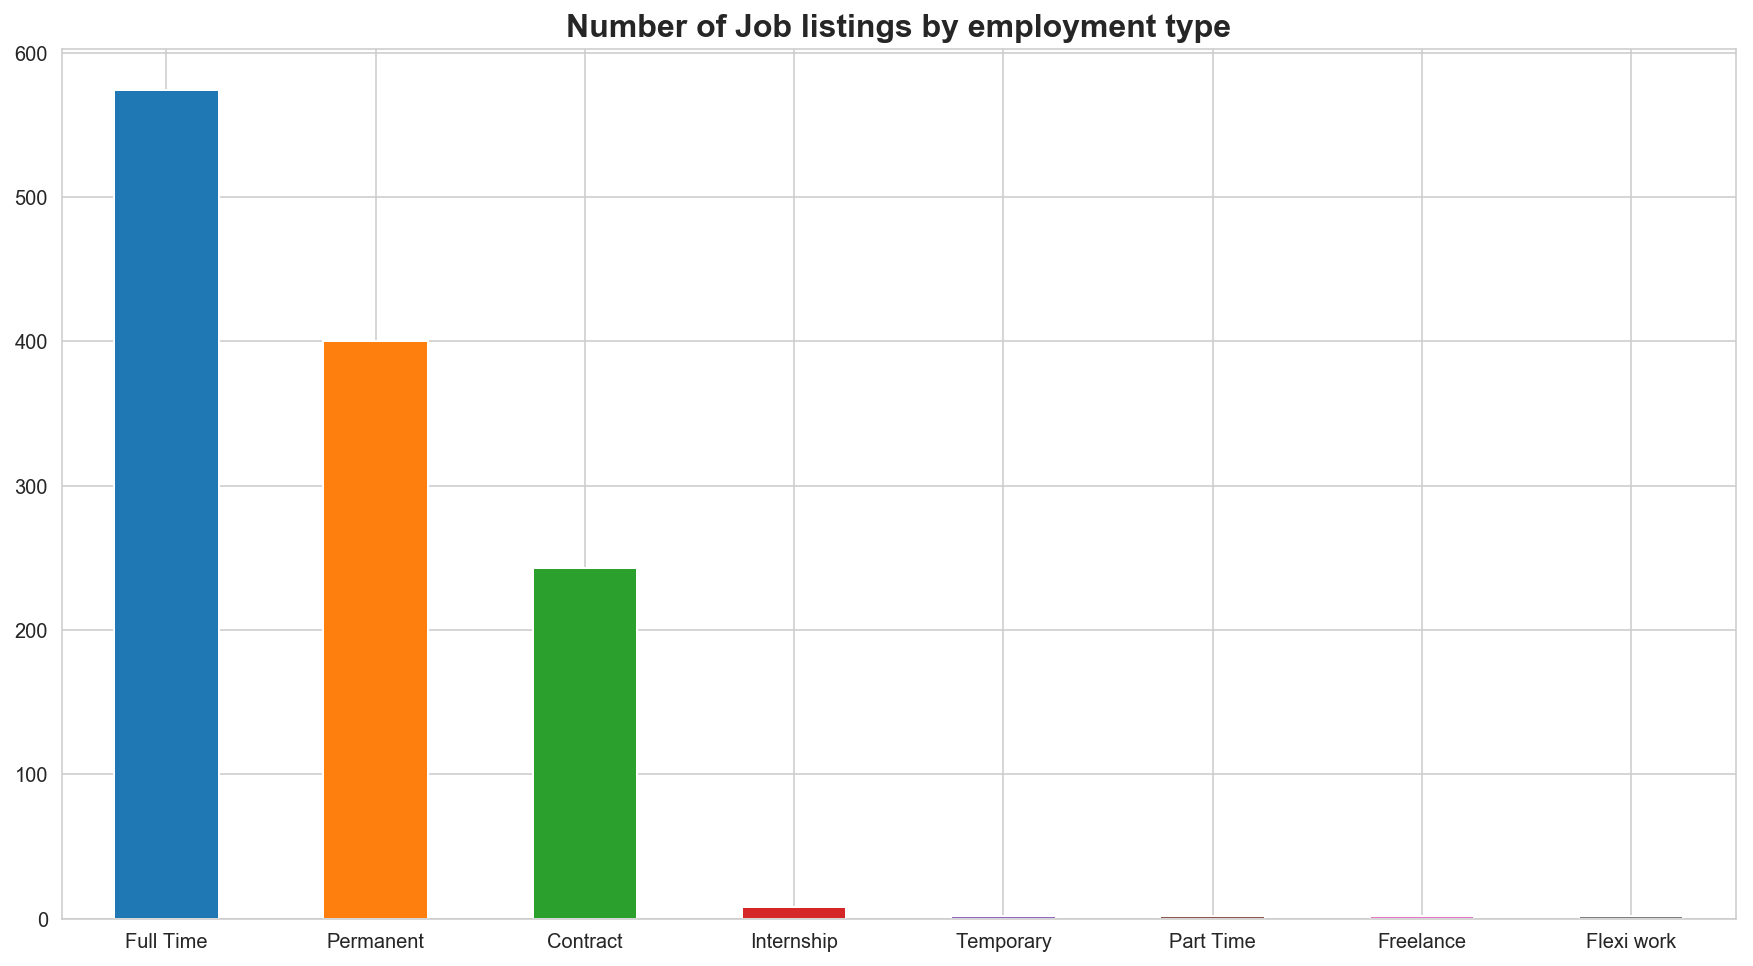

In [33]:
## Generate dummies for employment_type
df['employment_type'].fillna('',inplace=True)
etype_cat=df['employment_type'].str.get_dummies(sep=', ')


plt.figure(figsize=(15,8))
ax=etype_cat.apply(sum).sort_values(ascending=False).plot.bar()
labels=ax.get_xticklabels()
ax.set_xticklabels(labels,rotation=0)
ax.set_title('Number of Job listings by employment type',fontsize=16,fontweight='bold')
plt.show()

In [34]:
## Perform the following updates:

comment='''
1. Perfrom splitting to reduce multiple values
2. Assumptions:
   a. Part Time jobs are few so we will drop these rows.
   b. All employment_type with 'Internship' will be classified as 'Internship'
   c. All employment_type with 'Permanent, Contract' will be classified as 'Permanent'
   d. All employment_type with less than 5 entries will be dropped.
3. Remove row entries with low counts. 
    For example temporary, internship and part-time jobs 
    have only one value. As these data dont have significant 
    contribution to our results. Those columns were removed.   
'''

In [35]:
## Part Time jobs are few so we will drop these rows.
str='Part Time'
df=df[df.employment_type.str.contains(str)==False]

In [36]:
## All employment_type with 'Internship' in its string value  
##      will be classified as 'Internship'   
str='Internship'
df.loc[df.employment_type.str.contains(str)] = 'Internship'

In [37]:
## All employment_type with 'Permanent, Contract'  in its string value
##      will be classified as 'Permanent'
str=['Permanent, Contract','Permanent, Contract, Full Time']
df.employment_type = df.employment_type.replace(str,'Permanent')

In [38]:
## All employment_type with less than 5 entries will be dropped.
field_count=df.employment_type.value_counts().sort_values(ascending=False)
str_search=[x for x,y in field_count.items() if y<5]

for str in str_search:
    print('Removing Rows with:',str)
    df=df[df.employment_type!=str]  

Removing Rows with: Permanent, Flexi work
Removing Rows with: Temporary, Contract, Full Time
Removing Rows with: Freelance


In [39]:
str='Permanent, Contract'
#df[df.employment_type.str.contains(str)]

#df[df.employment_type.str.contains(str)==True]['employment_type']
df[df.employment_type.str.contains(str)==True].loc[:,'employment_type']

Series([], Name: employment_type, dtype: object)

In [40]:
## Remove excess text  
df.employment_type=df.employment_type.apply(lambda x: x.split(',')[0])

In [41]:
df.employment_type.value_counts()

Permanent     397
Full Time     300
Contract      216
Internship      8
Name: employment_type, dtype: int64

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col4'><font color=black>Seniority</a></h7>    

In [42]:
## seniority (has null values)

In [43]:
# raj test

In [44]:
#fill the null value by NA
df.seniority=df.seniority.fillna("NA")

In [45]:
## Split seniority column
df.seniority=df.seniority.apply(lambda x: x.split(',')[0])

In [46]:
df.seniority.value_counts()

Professional         331
Executive            209
Middle Management     82
Senior Executive      75
Manager               73
Senior Management     39
Non-executive         35
Fresh/entry level     35
Junior Executive      31
Internship             8
NA                     3
Name: seniority, dtype: int64

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col5'><font color=black>Industrys</a></h7>

In [47]:
df.industrys=df.industrys.fillna("NA")

#split the employment_type column to reduce the length 
df.industrys=df.industrys.apply(lambda x: x.split('/')[0])

#split the employment_type column to reduce the length 
df.industrys=df.industrys.apply(lambda x: x.split(',')[0])

In [48]:
df.industrys.value_counts()

Information Technology       463
Engineering                  135
Sciences                      86
Banking and Finance           75
Consulting                    30
Education and Training        27
Others                        17
Advertising                   13
Marketing                      8
Internship                     8
Logistics                      7
Sales                          7
Admin                          6
Healthcare                     5
Design                         5
Human Resources                5
Risk Management                3
Professional Services          3
Building and Construction      3
Telecommunications             2
Insurance                      2
Accounting                     2
Travel                         2
General Management             2
Public                         2
Manufacturing                  1
Environment                    1
General Work                   1
Name: industrys, dtype: int64

In [49]:
## retain the top rows.
field_count=df.industrys.value_counts().sort_values(ascending=False)
mycols=[x for x,y in field_count.items() if y>100]

print(mycols)
df = df[df.industrys.isin(mycols)]

df.industrys.value_counts()

['Information Technology', 'Engineering']


Information Technology    463
Engineering               135
Name: industrys, dtype: int64

In [50]:
## 'Sciences' has a space value at the end so remove it

df.industrys = df.industrys.replace('Sciences ','Sciences')

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col6'><font color=black>Location</a></h7>

In [51]:
df.location.value_counts()

Central                 229
South                    72
East                     60
Islandwide               59
West                     31
North                     7
South, Central            5
East, Central             2
South, East, Central      1
Name: location, dtype: int64

In [52]:
## replace null values with NA
df.location=df.location.fillna("NA")

In [53]:
#split the employment_type column to reduce the length 
df.location=df.location.apply(lambda x: x.split(',')[0])

In [54]:
df.location.value_counts()

Central       229
NA            132
South          78
East           62
Islandwide     59
West           31
North           7
Name: location, dtype: int64

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col7'><font color=black>Government Suppport</a></h7>

In [55]:
## gov_support (has null values)

In [56]:
## Check null values 
print('# of null values in gov_support:',df.gov_support.isnull().sum())

# of null values in gov_support: 200


In [57]:
## Convert Value into 'yes' or 'no'
df['gov_support']=df.gov_support.apply(lambda x: 'yes' if x=='Government support available' else 'no')

In [58]:
print('# of null values in gov_support:',df.gov_support.isnull().sum())

# of null values in gov_support: 0


[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col8'><font color=black>Job Titles</a></h7> 

Use Non-Negative Matrix Factorization (NMF)

<h7><a name='col8a'><font color=black><b>NMF Preprocessing</a></h7>

In [59]:
#Use TF-IDF Vectorization to create a vectorized document term matrix. 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

titles= tfidf.fit_transform(df['job_titles'])
titles

<598x171 sparse matrix of type '<class 'numpy.float64'>'
	with 2061 stored elements in Compressed Sparse Row format>

<h7><a name='col8b'><font color=black><b>NMF Model</a></h7>

In [60]:
from sklearn.decomposition import NMF

#Using Scikit-Learn an instance of NMF with 10 
#   expected components and random_state=42 was used 

nmf_model = NMF(n_components=10,random_state=42)
nmf_model.fit(titles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [61]:
#printing top 15 words per topic

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 7 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-7:]])
    print('\n')

THE TOP 7 WORDS FOR TOPIC #0
['science', 'machine', 'devops', 'center', 'learning', 'data', 'engineer']


THE TOP 7 WORDS FOR TOPIC #1
['developer', 'mid', 'engineering', 'staff', 'level', 'engineer', 'software']


THE TOP 7 WORDS FOR TOPIC #2
['algorithm', 'lead', 'mid', 'level', 'junior', 'data', 'scientist']


THE TOP 7 WORDS FOR TOPIC #3
['analytics', 'product', 'crm', 'junior', 'business', 'data', 'analyst']


THE TOP 7 WORDS FOR TOPIC #4
['sales', 'pre', 'data', '3500', 'days', '4000', 'orchard']


THE TOP 7 WORDS FOR TOPIC #5
['avp', 'science', 'analytics', 'assistant', 'associate', 'fellow', 'research']


THE TOP 7 WORDS FOR TOPIC #6
['big', 'web', 'application', 'stack', 'java', 'python', 'developer']


THE TOP 7 WORDS FOR TOPIC #7
['machine', 'designer', 'learning', 'backend', 'level', 'consultant', 'senior']


THE TOP 7 WORDS FOR TOPIC #8
['3500', 'key', 'river', 'valley', '5500', 'account', 'manager']


THE TOP 7 WORDS FOR TOPIC #9
['database', 'analytics', 'architect', 'le

<h7><a name='col8c'><font color=black><b>New Field job_titles_topics</a></h7>

In [62]:
#Add a new column to the dataframe that labels the job_titles

topic_results = nmf_model.transform(titles)
topic_results.argmax(axis=1)

df['job_titles_topics'] = topic_results.argmax(axis=1)

In [63]:
df.job_titles_topics.value_counts()

0    106
9    103
1     60
7     59
2     59
6     54
3     51
8     50
5     34
4     22
Name: job_titles_topics, dtype: int64

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col9'><font color=black>Job Descriptions</a></h7>
</div>
            

<p>We will be use LDA(LatentDirichletAllocation)Topic Modeling
to create new Feature job_description_topic 

<h7><a name='col9a'><font color=black><b>LDA - Preprocessing </a></h7>

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
job_des = cv.fit_transform(df['job_descriptions'])

In [65]:
job_des

<598x3994 sparse matrix of type '<class 'numpy.int64'>'
	with 56448 stored elements in Compressed Sparse Row format>

<h7><a name='col9b'><font color=black><b>LDA Topic Model</a></h7>

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

LDA_model = LatentDirichletAllocation(n_components=10,random_state=42)

In [67]:
LDA_model.fit(job_des)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [68]:
len(cv.get_feature_names())

3994

In [69]:
## random
import random

for i in range(10):
    random_word_id = random.randint(0,3271)
    print(cv.get_feature_names()[random_word_id])

national
glaxosmithkline
instrumental
ids
credit
members
minimize
aerospace
milestones
routine


In [70]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [71]:
print('LDA_model.components_    :',len(LDA_model.components_))
LDA_model.components_

LDA_model.components_    : 10


array([[0.22006331, 2.09975728, 0.10002177, ..., 0.1       , 1.15771105,
        0.10001341],
       [2.30995351, 0.1       , 0.1       , ..., 0.10000504, 0.10000519,
        0.10003213],
       [0.10000132, 0.1000119 , 1.10000064, ..., 0.1       , 0.10001265,
        0.1       ],
       ...,
       [0.10000921, 4.31877544, 0.1       , ..., 0.1       , 0.10000365,
        0.1       ],
       [0.1       , 0.10019347, 0.1       , ..., 0.1       , 0.1000061 ,
        0.1       ],
       [0.10001246, 0.10022292, 6.81812081, ..., 0.1       , 8.86058261,
        0.1       ]])

In [72]:
print('LDA_model.components_[0] :',len(LDA_model.components_[0]))
single_topic = LDA_model.components_[0]

LDA_model.components_[0] : 3994


In [73]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([3576, 3730, 1499, ...,  493, 3602,  927], dtype=int64)

In [74]:
# Word least representative of this topic
print('least representative: {}'.format(single_topic.argsort()[0]))

# Word most representative of this topic
print('most representative : {}'.format(single_topic.argsort()[-1]))

# Top 10 words for this topic:
print('\nTop 10 words for this topic:\n',single_topic.argsort()[-10:])

least representative: 3576
most representative : 927

Top 10 words for this topic:
 [2344 2751 3961 1013 3956 3618  484  493 3602  927]


In [75]:
top_word_indices = single_topic.argsort()[-10:]
for index in top_word_indices:
    print(cv.get_feature_names()[index])

new
product
working
design
work
technology
build
business
team
data


In [76]:
for index,topic in enumerate(LDA_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['role', 'customer', 'platform', 'software', 'solutions', 'new', 'product', 'working', 'design', 'work', 'technology', 'build', 'business', 'team', 'data']


THE TOP 15 WORDS FOR TOPIC #1
['provide', 'develop', 'development', 'technology', 'sales', 'management', 'digital', 'network', 'responsible', 'client', 'work', 'solutions', 'team', 'data', 'project']


THE TOP 15 WORDS FOR TOPIC #2
['mining', 'related', 'problems', 'science', 'build', 'models', 'develop', 'business', 'algorithms', 'techniques', 'engineering', 'team', 'machine', 'learning', 'data']


THE TOP 15 WORDS FOR TOPIC #3
['end', 'data', 'infrastructure', 'design', 'cloud', 'software', 'youâ', 'web', 'products', 'technology', 'testing', 'technologies', 'applications', 'development', 'experience']


THE TOP 15 WORDS FOR TOPIC #4
['implementation', 'specifications', 'review', 'performance', 'database', 'testing', 'plan', 'support', 'requirements', 'documentation', 'project', 'team', 'automation',

In [77]:
topic_results = LDA_model.transform(job_des)
topic_results.shape

(598, 10)

In [78]:
topic_results[0]

array([0.15719057, 0.00069949, 0.00069945, 0.00069946, 0.0006994 ,
       0.00069953, 0.64025697, 0.00069941, 0.00069947, 0.19765625])

In [79]:
topic_results[0].round(2)

array([0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.  , 0.2 ])

In [80]:
topic_results[0].argmax()

6

In [81]:
topic_results.argmax(axis=1)

array([6, 6, 6, 6, 6, 6, 6, 0, 6, 9, 9, 6, 6, 8, 6, 6, 6, 6, 6, 6, 8, 9,
       2, 6, 2, 2, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 9, 0, 9, 6, 6, 6, 6,
       0, 6, 9, 6, 6, 0, 0, 6, 6, 6, 0, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6,
       6, 6, 6, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       9, 6, 0, 0, 9, 9, 6, 6, 6, 0, 3, 3, 3, 6, 2, 6, 2, 6, 1, 1, 9, 6,
       9, 6, 6, 8, 6, 6, 0, 6, 7, 6, 6, 6, 3, 5, 5, 6, 8, 1, 6, 6, 6, 0,
       0, 6, 6, 6, 1, 1, 6, 6, 1, 6, 6, 6, 9, 9, 6, 9, 6, 6, 6, 6, 6, 0,
       6, 6, 6, 6, 6, 6, 0, 6, 9, 6, 6, 9, 9, 9, 1, 3, 7, 7, 6, 6, 9, 6,
       9, 6, 5, 0, 6, 6, 1, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 9, 6, 6, 6, 6, 6, 6, 5, 3,
       3, 4, 6, 6, 6, 6, 5, 6, 6, 4, 1, 1, 1, 0, 6, 9, 9, 6, 6, 6, 4, 0,
       4, 6, 6, 6, 6, 5, 6, 4, 0, 4, 6, 6, 4, 9, 9, 8, 5, 4, 5, 5, 5, 0,
       5, 6, 2, 6, 6, 5, 0, 5, 5, 0, 5, 0, 6, 4, 0,

<h7><a name='col9b'><font color=black><b>New Field job_description_topic</a></h7>

In [82]:
df['job_description_topic'] = topic_results.argmax(axis=1)

In [83]:
cols=['job_titles','companys','job_descriptions','job_description_topic']
df[cols].head(3)

,job_titles,companys,job_descriptions,job_description_topic
1,Applied Data Science Associate,DATAROBOT SINGAPORE PTE. LTD.,Looking to move into Data Science? Want to lea...,6
5,Senior / Data Engineer (Data Science Team),M1 LIMITED,"Design, optimise/tune performance, maintain, ...",6
8,Data Science Engineer,DATAROBOT SINGAPORE PTE. LTD.,"As a Data Science Engineer in DataRobot, you w...",6


In [84]:
df.job_description_topic.value_counts()

6    258
3     59
5     52
0     52
1     51
9     42
7     34
8     21
4     15
2     14
Name: job_description_topic, dtype: int64

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='col10'><font color=black>Job Requirements</a></h7>

Use Non-Negative Matrix Factorization (NMF)

<h7><a name='col10a'><font color=black><b>Null Values in Job Requests</a></h7>

In [85]:
## job_requirements (has null values)

In [86]:
## Check null values 
print('# of null values in job_requirements:',df.job_requirements.isnull().sum())

# of null values in job_requirements: 27


In [87]:
## update by filling field with NA
df.job_requirements=df.job_requirements.fillna("NA")

In [88]:
print('# of null values in job_requirements:',df.job_requirements.isnull().sum())

# of null values in job_requirements: 0


<h7><a name='col10b'><font color=black><b>NMF Preprocessing</a></h7>

In [89]:
#Use TF-IDF Vectorization to create a vectorized document term matrix. 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

req= tfidf.fit_transform(df['job_requirements'])
req

<598x2984 sparse matrix of type '<class 'numpy.float64'>'
	with 38867 stored elements in Compressed Sparse Row format>

<h7><a name='col10c'><font color=black><b>NMF Model</a></h7>

In [90]:
from sklearn.decomposition import NMF

#Using Scikit-Learn an instance of NMF with 10 
#   expected components and random_state=42 was used 

nmf_model = NMF(n_components=10,random_state=42)
nmf_model.fit(req)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [91]:
#printing top 15 words per topic

for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['requirements', 'computer', 'field', 'minimum', 'preferred', 'related', 'python', 'database', 'aws', 'knowledge', 'years', 'sql', 'working', 'plus', 'experience']


THE TOP 15 WORDS FOR TOPIC #1
['servers', 'range', 'cissp', '6pm', '9am', 'fridays', 'comptia', 'mondays', 'ceh', 'relevant', 'com', 'salary', 'possess', 'ecsa', 'thank']


THE TOP 15 WORDS FOR TOPIC #2
['exp', 'expertise', 'expect', 'expected', 'experience', 'experienced', 'experiences', 'experienceâ', 'experiment', 'experimental', 'experimentation', 'experiments', 'expectations', 'zookeeper', 'na']


THE TOP 15 WORDS FOR TOPIC #3
['deadlines', 'skill', 'andâ', 'requirementsjob', 'direct', 'handle', 'tight', 'account', 'negotiation', 'situation', 'selling', 'stressful', 'consultation', 'com', 'thank']


THE TOP 15 WORDS FOR TOPIC #4
['statistics', 'research', 'experience', 'skills', 'algorithms', 'electrical', 'programming', 'phd', 'python', 'science', 'engineering', 'deep', 'computer', 'mach

In [92]:
#Add a new column to the dataframe that labels the job requirements

topic_results = nmf_model.transform(req)
topic_results.argmax(axis=1)

array([4, 5, 5, 4, 4, 4, 7, 4, 2, 4, 4, 2, 7, 2, 9, 9, 5, 2, 5, 4, 2, 5,
       4, 5, 4, 4, 5, 5, 7, 4, 4, 4, 0, 7, 4, 5, 4, 4, 0, 0, 8, 4, 5, 0,
       4, 5, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 7, 0, 4, 8, 7, 7, 2, 8,
       5, 0, 5, 8, 8, 5, 5, 5, 0, 5, 0, 5, 5, 8, 5, 8, 9, 9, 9, 9, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 0, 4, 4, 5, 5, 5, 7, 4, 9, 5, 5, 5, 7, 8, 0, 0, 5, 2, 2, 7, 9,
       5, 0, 5, 7, 5, 5, 4, 7, 7, 7, 5, 0, 5, 9, 7, 5, 5, 0, 5, 0, 8, 7,
       7, 5, 5, 5, 0, 0, 5, 7, 0, 5, 0, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 0, 5, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 7, 7, 4, 5, 4, 7,
       7, 5, 3, 5, 2, 5, 5, 5, 5, 0, 5, 0, 0, 7, 7, 0, 2, 5, 5, 7, 5, 3,
       7, 5, 5, 5, 0, 5, 5, 4, 5, 5, 4, 2, 2, 5, 8, 5, 5, 5, 7, 7, 7, 5,
       5, 7, 5, 7, 7, 7, 0, 7, 7, 0, 0, 0, 0, 7, 0, 8, 8, 0, 5, 5, 0, 7,
       7, 8, 8, 9, 9, 4, 7, 0, 8, 0, 8, 5, 0, 7, 7, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 9, 8, 4, 4, 4, 4, 4, 4, 8, 0, 4, 8,

<h7><a name='col10d'><font color=black><b>New Field job_req_topics</a></h7>

In [93]:
#Add a new column to the dataframe that labels the job requirements
df['job_req_topics'] = topic_results.argmax(axis=1)

In [94]:
df.job_req_topics.value_counts()

5    113
7    110
4    107
8     97
0     73
2     27
1     25
3     22
9     15
6      9
Name: job_req_topics, dtype: int64

[Go Top](#top)

<div style="width:610px;background:#fdf0db;border:1px solid black;
  text-align:left;padding:8px;"><b>
<b><h7><a name='write'><font color=black>Write final Dataframe in an output file</a></h7>

In [95]:
## display all columns in dataframe to be written in output file
[x for x in df.columns]

['job_titles',
 'companys',
 'employment_type',
 'seniority',
 'industrys',
 'salary',
 'salary_terms',
 'job_descriptions',
 'job_requirements',
 'links',
 'location',
 'gov_support',
 'min_salary',
 'max_salary',
 'average_salary',
 'salary_med',
 'job_titles_topics',
 'job_description_topic',
 'job_req_topics']

In [96]:
filename='final_webscrape.csv'
path='data\\'
#output_file=path+filename

# First, create an empty DataFrame.
import pandas as pd
outfile=''
outfile = pd.DataFrame (columns=[x for x in df.columns])
   
for col in df.columns:
    outfile[col]=df[col]
    
outfile.to_csv('{}{}'.format(path,filename))
    
print('Created output file:',filename)

Created output file: final_webscrape.csv


In [97]:
df.shape

(598, 19)

[Go Top](#top)